## Importing Necessary Libraries and Dependencies
---- 

In [1]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Filter warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data
---

In [2]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path("data/housing_California.csv")
house_file_df = pd.read_csv(file_path)

# # Display sample data
house_file_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## Get the dimensions of the DataFrame (number of rows and columns)
house_file_df.shape

(20640, 10)

In [4]:
# Overview of the dataset
house_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Summary statistics
house_file_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning
---

### Check for missing or duplicate data

In [6]:
# Check for missing values in each column of the DataFrame
print(f"Total of missing values is {house_file_df.isnull().sum()}")

# Check for duplicate entries in the DataFrame
print(f"Total of duplicate entries is {house_file_df.duplicated().sum()}")

Total of missing values is longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total of duplicate entries is 0


### Handling Missing Values

The total_bedrooms column contained 207 missing values, which could negatively impact the analysis and predictive modeling. To address this, we filled the missing values with the mean of the column. This approach maintains the integrity of the dataset while minimizing bias introduced by dropping rows or columns with missing data.

In [7]:
# Fill missing values in the 'total_bedrooms' column with the mean of the column
house_file_df['total_bedrooms'] = house_file_df['total_bedrooms'].fillna(house_file_df['total_bedrooms'].mean())

# Verify the total number of missing values in 'total_bedrooms' after filling
print(f"Total of missing values in 'total_bedrooms' after fillna is {house_file_df['total_bedrooms'].isnull().sum()}")


Total of missing values in 'total_bedrooms' after fillna is 0


### Calculating Average Prices

New columns, price_per_room and price_per_bedroom, were created to provide insights into the average prices associated with each room and bedroom. These calculations help to normalize the house prices relative to the number of rooms and bedrooms, allowing for more equitable comparisons across properties of different sizes.

In [8]:
# Calculate the average price per room by dividing the median house value by the total number of rooms
house_file_df['price_per_room'] = house_file_df['median_house_value'] / house_file_df['total_rooms']

# Calculate the average price per bedroom by dividing the median house value by the total number of bedrooms
house_file_df['price_per_bedroom'] = house_file_df['median_house_value'] / house_file_df['total_bedrooms']

#Verify New Columns
print(house_file_df[['price_per_room', 'price_per_bedroom']].head())


   price_per_room  price_per_bedroom
0      514.318182        3508.527132
1       50.500070         324.141049
2      240.013633        1853.157895
3      267.896389        1452.340426
4      210.325753        1222.142857


### Transform "ocean_proximity" column with get_dummies

Creating Dummy Variables

The categorical variable ocean_proximity was transformed into dummy variables using One Hot Encoding. This process allows the model to interpret categorical data in a numerical format, which is necessary for many machine learning algorithms.

In [9]:
# Create dummy variables for the 'ocean_proximity' column to convert categorical data into numerical format
ocean_proximity_dummies = pd.get_dummies(house_file_df.ocean_proximity, prefix='prox_').astype(int)
ocean_proximity_dummies.head()


,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
# Concatenate the dummy variables to the original DataFrame 
house_df = pd.concat([house_file_df, ocean_proximity_dummies], axis=1)

# Remove the original 'ocean_proximity' column from the DataFrame
house_df.drop('ocean_proximity', axis=1, inplace=True)

# Verify the updated DataFrame with the new dummy variable columns
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_per_room,price_per_bedroom,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,514.318182,3508.527132,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,50.500070,324.141049,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,240.013633,1853.157895,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,267.896389,1452.340426,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,210.325753,1222.142857,0,0,0,1,0


# EDA Visualizations
---

### Plot histograms to visualize the distribution of values.

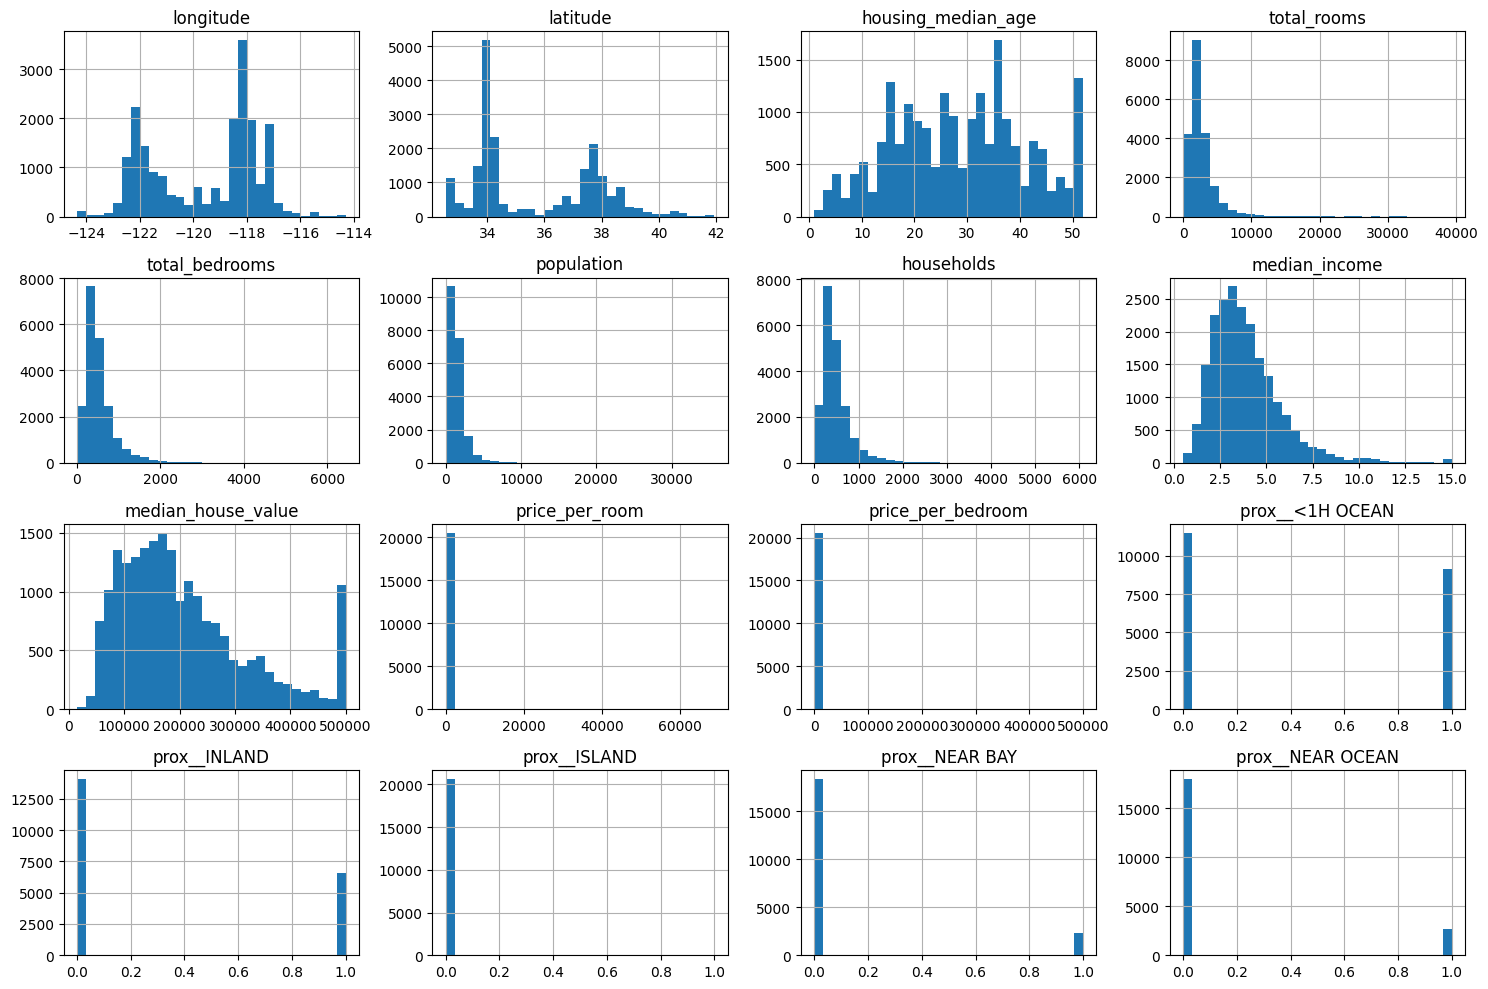

In [11]:
# Plot histograms
house_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Plot histograms - observations:

1. Median Age of Houses (housing_median_age): Most houses are between 15 and 35 years old, with a slight peak between 20 and 30 years. There is no strong trend showing many new or very old houses.

2. Total Rooms (total_rooms) and Total Bedrooms (total_bedrooms): The distribution is mostly skewed to the left, meaning most houses have fewer rooms. However, there are some exceptions with a much higher number of bedrooms.

3. Population (population) and Households (households): These two variables have similar patterns, with most cities having a relatively small population and number of families. There are a few areas with very high population density.

4. Median Income (median_income): Most families have a median income between 2 and 6 units, showing some uniformity in income levels, while a smaller group has higher incomes.

5. Median House Value (median_house_value): This distribution is skewed to the right, which means most houses are in the lower price range, but there are some very high values.

6. Price per Room (price_per_room) and Price per Bedroom (price_per_bedroom): These columns also show a skewed distribution, with many low values, but a few houses have much higher prices.

7. Proximity to the Ocean: The data shows that most houses are located "inland," with few near islands or bays.

Overall, the histograms indicate that the data have uneven distributions in several areas, with some outliers in the number of bedrooms, population, and house values.

---

### Box Plots to identify outliers 

Box plots are essential for visualizing data distribution and identifying outliers in our dataset. They allow us to quickly assess the presence of extreme values that may distort our analysis. This is particularly important in our housing price dataset, as outliers can significantly impact pricing trends and interpretations.

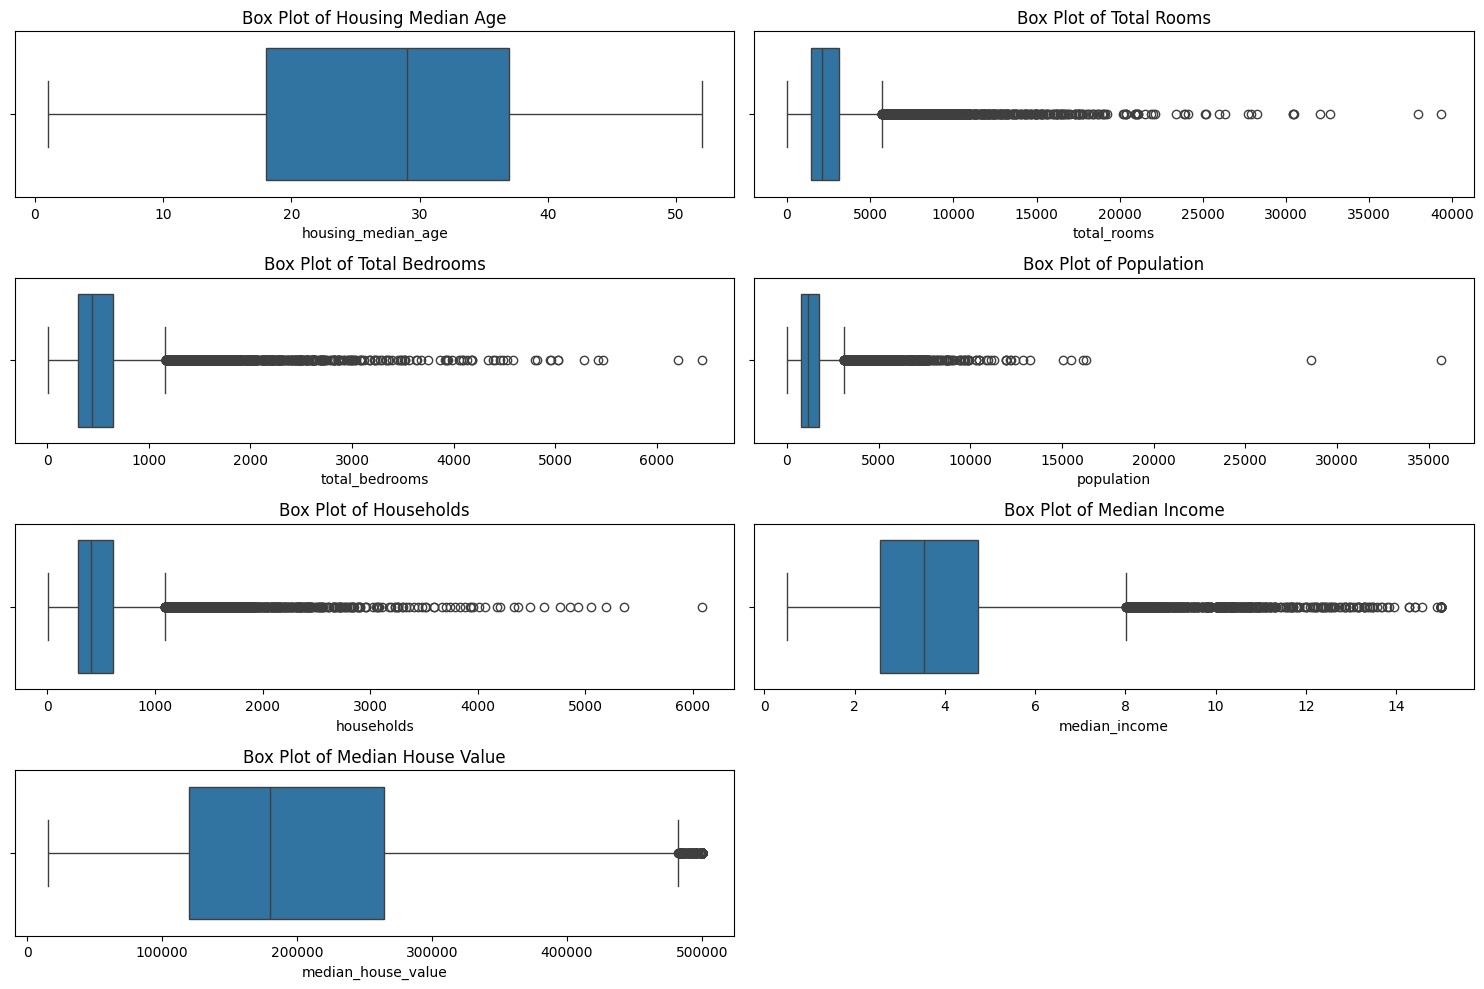

In [12]:
# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# List of variables to plot
variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
             'population', 'households', 'median_income', 'median_house_value']

# Create subplots for each variable
for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.boxplot(x=house_df[var])
    plt.title(f'Box Plot of {var.replace("_", " ").title()}')
plt.tight_layout()

# Show the plots
plt.show()


### Box Plot - Observations:

1. Median Age of Houses (housing_median_age): The distribution appears relatively symmetrical, with few outliers, suggesting that the age of the houses is mostly uniform.

2. Total Bedrooms (total_bedrooms) and Total Rooms (total_rooms): Both plots show many outliers, indicating that some houses have an unusually high number of bedrooms compared to most. This may warrant further analysis or the removal of these outliers.

3. Population (population) and Households (households): There are many outliers in these variables, suggesting that certain areas have significantly larger populations or numbers of families than most. It might be necessary to consider removing these outliers based on their impact on the model.

4. Median Income (median_income): While there are a few outliers, most data points are concentrated in the middle, indicating that median income levels are relatively consistent.

5. Median House Value (median_house_value): The distribution is asymmetric, but there are not many obvious outliers. This suggests that house values are well concentrated within a certain range, with only a few extreme values.


---

### Removing Outliers

We identify and remove outliers from the median_house_value column of the dataset using the Interquartile Range (IQR) method.

In [13]:
# Calculating Quartiles and IQR:
## Calculation of the first quartile (Q1) and third quartile (Q3) of the median house value.
Q1 = house_df['median_house_value'].quantile(0.25)
Q3 = house_df['median_house_value'].quantile(0.75)

## The IQR is calculated as the difference between Q3 and Q1, representing the range of central data.
IQR = Q3 - Q1

# Filter outliers using query
house_df_cleaned = house_df.query('(@Q1 - 1.5 * @IQR) <= median_house_value <= (@Q3 + 1.5 * @IQR)')


### Data Visualization: Before and After removing outliers
Creating histograms to visualize the distribution of median house values before and after removing outliers.

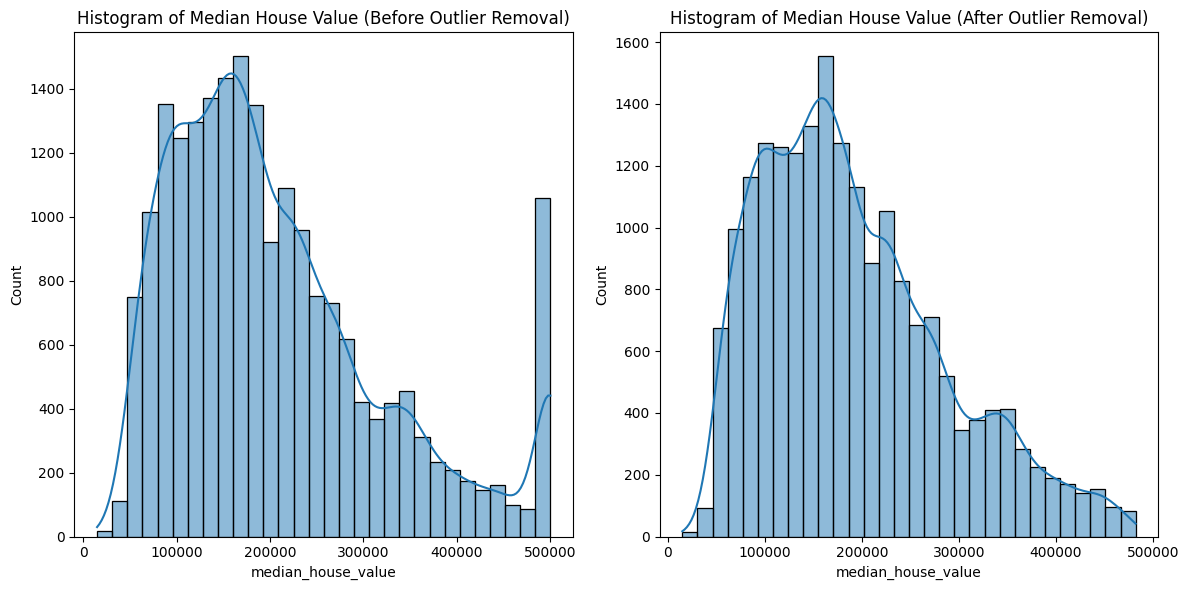

In [14]:
# Plotting histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st chart
sns.histplot(house_df['median_house_value'], bins=30, kde=True) ## The use of kde=True overlays a kernel density estimate on the histogram
plt.title('Histogram of Median House Value (Before Outlier Removal)')

# Plotting histogram after removing outliers
plt.subplot(1, 2, 2)  
sns.histplot(house_df_cleaned['median_house_value'], bins=30, kde=True) ## The use of kde=True overlays a kernel density estimate on the histogram
plt.title('Histogram of Median House Value (After Outlier Removal)')

plt.tight_layout()
plt.show()


---

### Correlation matrix to visualize the linear relationship between the variables in the dataset

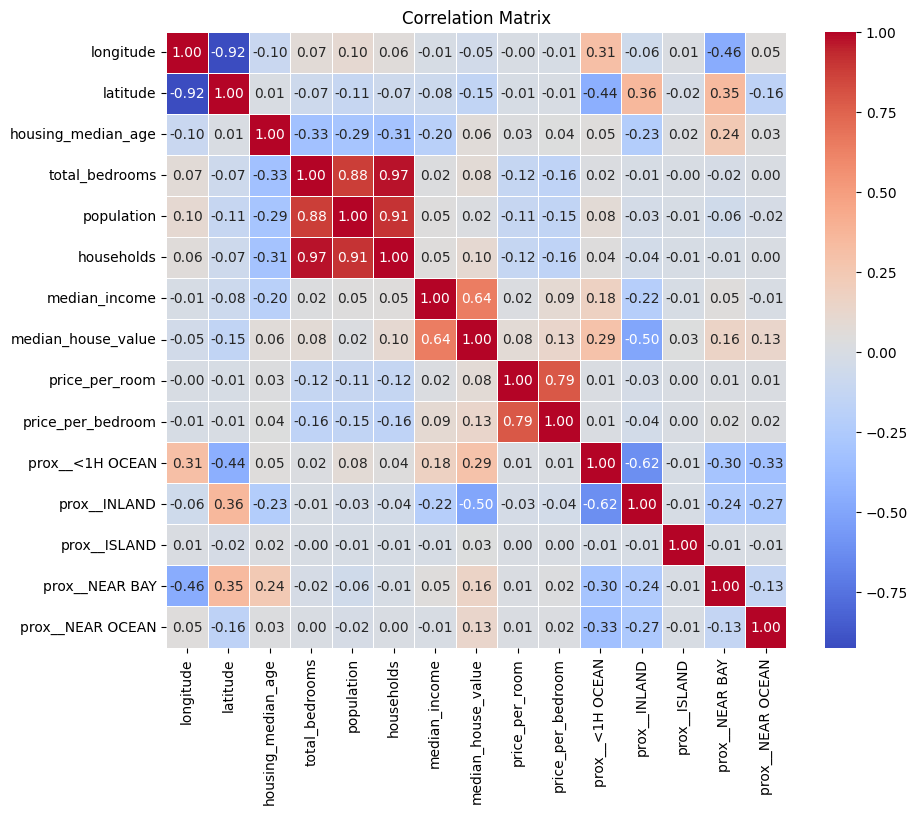

In [15]:
# Create a modified DataFrame without the 'total_rooms' column for the correlation matrix
house_df_heatmap = house_df_cleaned.drop(columns=['total_rooms'])

# Generate the correlation matrix
corr_matrix = house_df_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Correlation Matrix - Observations:

### Strong positive correlation:

1. More rooms, more bedrooms: Homes with more rooms usually have more bedrooms.
2. Households and population: Areas with more households tend to have a higher population.
3. More households, more bedrooms: Regions with more households usually have more bedrooms available.

### Factors that increase house value:

1. Income: Higher median income is associated with higher house values.
2. Number of rooms and bedrooms: Having more rooms or bedrooms can increase house value, but not as much as income does.

### Factors that decrease house value:

1. Inland location: Homes located inland (away from the coast) tend to have lower values.
2. Geographical location: Proximity to the ocean influences longitude, meaning homes near the ocean are in specific regions.

# Machine Learning
---

### Split our data into training and testing 
The dataset is divided into training and testing sets to evaluate the model's performance accurately


**Parameters Passed to train_test_split:**

* `X`: The feature matrix (input data), which contains the data points to be split.

* `y`: The target labels (output data), which indicate the category or value you are trying to predict or classify.

* `random_state=1`: The random seed ensures reproducibility. If you specify a value for random_state, the function will always split the data in the same way, so you can reproduce your results.
  
* `stratify=y`: Stratification ensures that the proportion of target labels (y) in the training and test sets remains the same as in the original dataset. In other words, the **split will maintain the balance of classes** in `y` across both the training and test datasets.


---

## Model : Random Forest Regressor
___

In [16]:
# Copy dataset
house_price_df = house_df_cleaned.copy()

# Prepare the data
X = house_price_df.drop(columns=['median_house_value'])  # Features
y = house_price_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 253082191.17
R^2 Score: 0.97


### Visualize Predictions
Visualizing the predicted vs. actual values to provide insights into where your model is performing well or poorly:

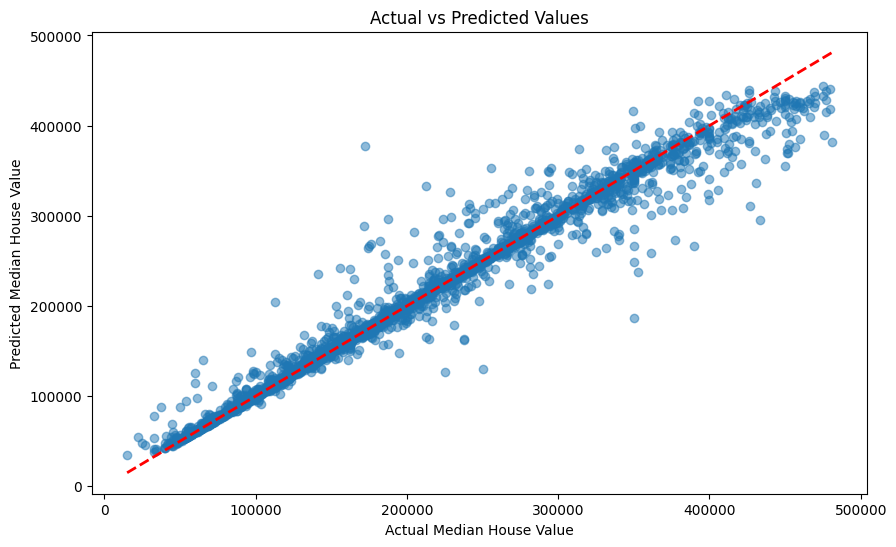

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.show()


### Cross-Validation
Implementing cross-validation can provide a more robust evaluation of your model:

In [19]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)

print(f'Mean CV MSE: {mse_cv:.2f}')
print(f'Mean CV RMSE: {rmse_cv:.2f}')

Mean CV MSE: 363586117.95
Mean CV RMSE: 19067.93


The Mean Cross-Validation Mean Squared Error (MSE) you obtained (363,586,117.95) indicates the average error of your model's predictions across different subsets of your dataset during the cross-validation process

### Feature Importance
Analyzing feature importance can help identify which features are most influential in predicting house prices:

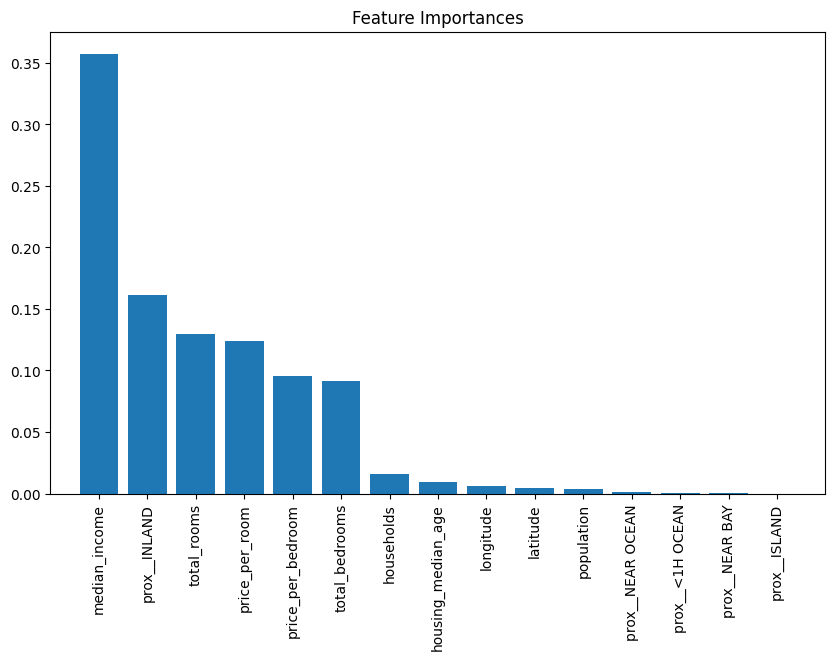

In [20]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## Since the model is considering the column 'prox__INLAND' as an important feature, I decided to remove it and analyze how the model behaves:

In [21]:
# Make a copy of the dataset
dataset_df = house_price_df.copy()

# Drop the "prox__INLAND" colunm
dataset_df.drop('prox__INLAND', axis=1, inplace=True)


#******************# Initiate the model: #******************#

# Prepare the data
X = dataset_df.drop(columns=['median_house_value'])  # Features
y = dataset_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 190586054.92
R^2 Score: 0.98


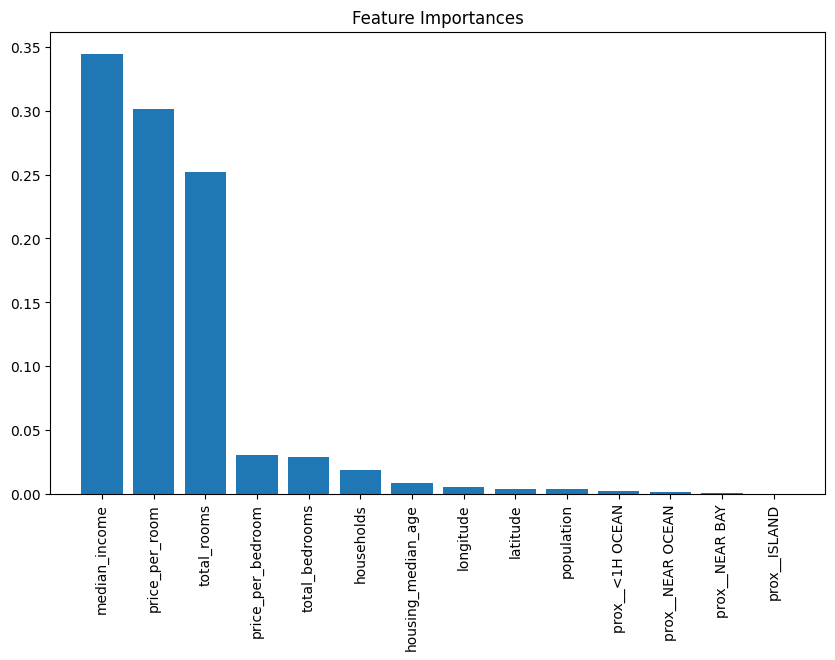

In [23]:
# Analyze the important features and check if the model's selections make sense

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Conclusion of model performance
The model shows strong performance, as indicated by these metrics:

Mean Squared Error (MSE): The MSE decreased from about 240.4 million to around 190.6 million after removing the feature. A lower MSE means the model's predictions are closer to the actual values, which indicates better performance.

R² Score: The R² score increased from 0.97 to 0.98. A value closer to 1 means the model explains more of the variance. The increase in this score suggests that the model became more effective at capturing patterns in the data after the feature was removed.

### Conclusion: 

Removing the feature that was considered unimportant improved the model's performance, as shown by the lower MSE and higher R² score. This suggests that the model may have relied too much on that feature or that it added noise to the predictions. It is important to regularly evaluate feature importance and impact, as you have done here.

## Tests Random Forest Regressor Model:

### Actual vs Predicted values:

In [24]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

         Actual  Predicted
2709    55200.0    54558.0
13133   97800.0   100828.0
18028  245300.0   244689.0
16330  162100.0   162460.0
5593   163100.0   161955.0
...         ...        ...
6873   182100.0   182728.0
8484   154700.0   155119.0
10295  235000.0   286907.0
815    187000.0   186054.0
6016   128700.0   129761.0

[3914 rows x 2 columns]


### MAE - Meam Absolute error:

The MAE value represents the average difference between the actual house values and the model's predictions


In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5124.548185998979


### Comparison of Actual and Predicted Median House Values:

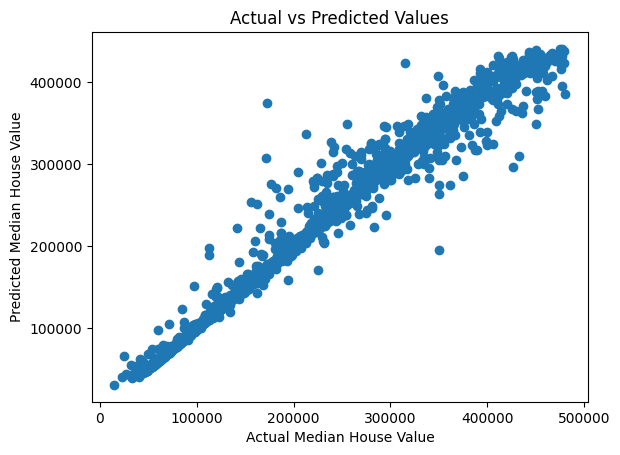

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.show()


## Simulation in years:

In [27]:
# Simulation in years
future_years = 34  # Number of years to project
growth_rate = 0.03  # 3% annual growth

# Calculate future prices
results[f'Future Price in {1990 + future_years}'] = results['Predicted'] * ((1 + growth_rate) ** future_years)

print(results[['Actual', 'Predicted', f'Future Price in {1990 + future_years}']])



         Actual  Predicted  Future Price in 2024
2709    55200.0    54558.0         149047.289112
13133   97800.0   100828.0         275452.547135
18028  245300.0   244689.0         668467.174852
16330  162100.0   162460.0         443825.334308
5593   163100.0   161955.0         442445.722134
...         ...        ...                   ...
6873   182100.0   182728.0         499195.590837
8484   154700.0   155119.0         423770.417534
10295  235000.0   286907.0         783802.752618
815    187000.0   186054.0         508281.907850
6016   128700.0   129761.0         354494.763050

[3914 rows x 3 columns]


---

# Model: Gradient Boosting Regressor
---

In [28]:
# Copy dataset
house_GB_df = dataset_df.copy()


# Prepare Data
X = house_df.drop('median_house_value', axis=1)  # Features
y = house_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100,  # n_estimators: Number of trees to be built.
                                  learning_rate=0.1, # learning_rate: The learning rate, which determines how much each tree contributes to the final prediction
                                  max_depth=3,       # max_depth: Maximum depth of the trees, which controls overfitting.
                                  random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 552984735.3352711
Root Mean Squared Error: 23515.62747058371
R-squared: 0.9578005993153679


---

# Model: LinearRegression
---

In [29]:
# Copy dataset
house_LR_df = dataset_df.copy()

# Prepare the data
X = house_LR_df.drop(columns=['median_house_value'])  # Features
y = house_LR_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3438245137.852305
Root Mean Squared Error: 58636.55121042083
R-squared: 0.6282255795661202
